In [ ]:
# Week 07 Project
# The objective of this code is to make predictions on Berlin temperature, in the short term and long run
# The code follows these steps:
# 1. Load and clean data 
# 2. Build baseline model with linear regression + plot residuals (short term prediction)
# 3. Plot and inspect different components of time series 
# 4. Model time dependence(AR model)
# 5. Compare statistical output of different AR models
# 6. Test the remainder for stationarity + compare autocorrelation of noise, trend and stationary data 
# 7. Make predictions (long term)

In [13]:
import pandas as pd

In [ ]:
# Get and clean data 

In [14]:
df = pd.read_csv('TG_STAID002759.txt', skiprows=18)
df.head(3)

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0


In [ ]:
# Indexing data and adding time stamps 

In [15]:
df.columns=[x.strip() for x in df.columns]
df.columns

Index(['SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

In [16]:
df['timestamp'] = pd.to_datetime(df['DATE'], format="%Y%m%d")
df.set_index('timestamp', inplace=True)
df.head(3)

,SOUID,DATE,TG,Q_TG
timestamp,,,,
1876-01-01,127488,18760101,22,0
1876-01-02,127488,18760102,25,0
1876-01-03,127488,18760103,3,0


In [17]:
df['temperature'] = df['TG'] / 10.0

<AxesSubplot:xlabel='timestamp'>

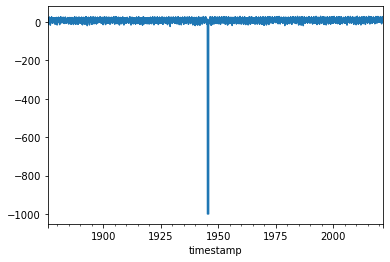

In [18]:
df['temperature'].plot()

In [19]:
missing = df[df['temperature'] == -999.9]
missing.tail()

,SOUID,DATE,TG,Q_TG,temperature
timestamp,,,,,
1945-11-01,127488,19451101,-9999,9,-999.9
1945-11-02,127488,19451102,-9999,9,-999.9
1945-11-03,127488,19451103,-9999,9,-999.9
1945-11-04,127488,19451104,-9999,9,-999.9
1945-11-05,127488,19451105,-9999,9,-999.9


In [20]:
df.loc['April 23rd, 1945':'November 7th, 1945']

,SOUID,DATE,TG,Q_TG,temperature
timestamp,,,,,
1945-04-23,127488,19450423,61,0,6.1
1945-04-24,127488,19450424,80,0,8.0
1945-04-25,127488,19450425,-9999,9,-999.9
1945-04-26,127488,19450426,-9999,9,-999.9
1945-04-27,127488,19450427,-9999,9,-999.9
...,...,...,...,...,...
1945-11-03,127488,19451103,-9999,9,-999.9
1945-11-04,127488,19451104,-9999,9,-999.9
1945-11-05,127488,19451105,-9999,9,-999.9


In [21]:
# Dealing with missing values

In [24]:
new = []
for day_temp in df['temperature']:
    if day_temp < -100:
        new.append(None)
    else:
        new.append(day_temp)
       
df['new'] = new
df['new'].ffill(inplace=True)

<AxesSubplot:xlabel='timestamp'>

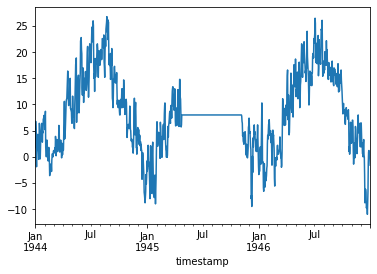

In [25]:
df['new']['1944-01-01':'1946-12-31'].plot()

In [26]:
a = df.loc['April 25th, 1944':'November 5th, 1944', 'temperature']
b = df.loc['April 25th, 1946':'November 5th, 1946', 'temperature']

In [27]:
c = []
for i in range(195):
    mean = (a.iloc[i] + b.iloc[i]) / 2
    c.append(mean)
c[:5]

[11.5, 13.4, 12.3, 11.149999999999999, 10.1]

In [28]:
df.loc['April 25th, 1945':'November 5th, 1945', 'temperature'] = c

<AxesSubplot:xlabel='timestamp'>

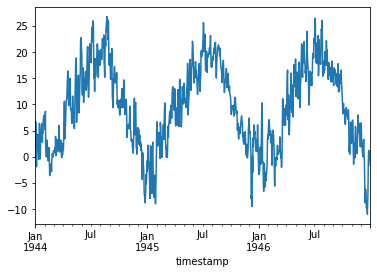

In [29]:
df['temperature']['1944-01-01':'1946-12-31'].plot()

In [30]:
df.describe()

,SOUID,DATE,TG,Q_TG,temperature,new
count,53204.000000,5.320400e+04,53204.000000,53204.000000,53204.000000,53204.000000
mean,119380.399519,1.948401e+07,56.985321,0.033005,9.418460,9.392625
std,8024.119753,4.205100e+05,614.972274,0.543885,7.881181,7.868960
min,111448.000000,1.876010e+07,-9999.000000,0.000000,-22.600000,-22.600000
25%,111448.000000,1.912060e+07,33.000000,0.000000,3.400000,3.400000
50%,111448.000000,1.948107e+07,94.000000,0.000000,9.400000,9.400000
75%,127488.000000,1.985040e+07,157.000000,0.000000,15.800000,15.700000
max,128124.000000,2.021083e+07,305.000000,9.000000,30.500000,30.500000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53204 entries, 1876-01-01 to 2021-08-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SOUID        53204 non-null  int64  
 1   DATE         53204 non-null  int64  
 2   TG           53204 non-null  int64  
 3   Q_TG         53204 non-null  int64  
 4   temperature  53204 non-null  float64
 5   new          53204 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 4.9 MB


In [ ]:
# Striped Heatmap

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# create a time series with Numpy here
data = df[['temperature']] 
data = data.reset_index()

#df = pd.DataFrame(data)
data.head()

,timestamp,temperature
0,1876-01-01,2.2
1,1876-01-02,2.5
2,1876-01-03,0.3
3,1876-01-04,-5.8
4,1876-01-05,-9.8


In [36]:
data['year'] = pd.DatetimeIndex(data['timestamp']).year
data['month'] = pd.DatetimeIndex(data['timestamp']).month
data.head(5)

,timestamp,temperature,year,month
0,1876-01-01,2.2,1876,1
1,1876-01-02,2.5,1876,1
2,1876-01-03,0.3,1876,1
3,1876-01-04,-5.8,1876,1
4,1876-01-05,-9.8,1876,1


In [37]:
#data.head()
d1 = pd.DataFrame(data.groupby(['year','month'])['temperature'].mean())
d1.head()

temperature
year month             
1876 1        -2.070968
     2         2.389655
     3         4.964516
     4         9.833333
     5        10.270968

In [38]:
d1.describe()

,temperature
count,1748.000000
mean,9.376004
std,7.108123
min,-10.457143
25%,3.175000
50%,9.124785
75%,15.873387
max,24.377419


In [39]:
d1 = d1.reset_index()
d1.head()

,year,month,temperature
0,1876,1,-2.070968
1,1876,2,2.389655
2,1876,3,4.964516
3,1876,4,9.833333
4,1876,5,10.270968


In [41]:
d2 = d1.pivot('year','month', 'temperature')
d2.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1876,-2.070968,2.389655,4.964516,9.833333,10.270968,18.503333,19.641935,19.183871,13.840000,11.877419,2.060000,1.125806
1877,3.138710,3.221429,3.206452,6.963333,11.306452,19.806667,19.500000,18.987097,12.096667,8.445161,7.553333,2.122581
1878,1.861290,4.142857,4.383871,10.416667,14.309677,17.643333,17.438710,18.938710,15.960000,11.538710,4.870000,1.003226
1879,-2.332258,0.732143,2.148387,7.066667,12.893548,17.950000,17.200000,19.167742,15.986667,9.212903,2.063333,-4.309677
1880,-0.816129,1.362069,4.574194,10.463333,12.632258,17.476667,19.890323,18.674194,15.900000,8.358065,5.040000,3.874194


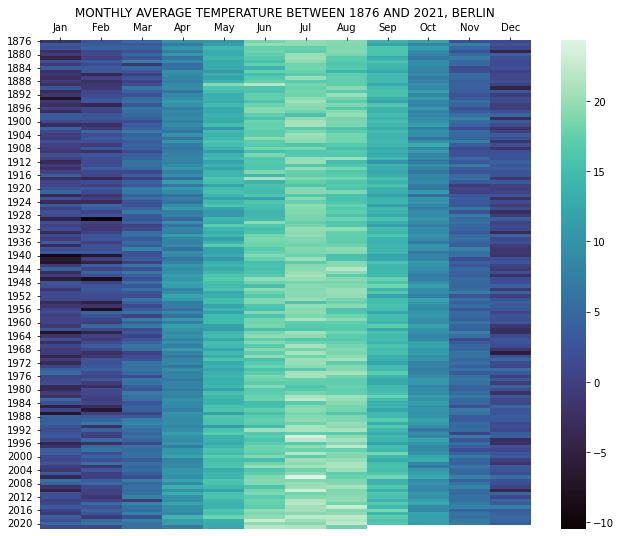

In [42]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(d2, cbar=True,cmap='mako') # set cmap="xxx" to see a list of available color maps

# turn off labels
#plt.xticks([])  
#plt.yticks([]) 

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average temperature between 1876 and 2021, Berlin'.upper()
plt.title(title, loc='center')


plt.savefig('stripes.png')

In [43]:
#EDA: temperature distribution
data.tail()

,timestamp,temperature,year,month
53199,2021-08-27,14.2,2021,8
53200,2021-08-28,15.4,2021,8
53201,2021-08-29,15.8,2021,8
53202,2021-08-30,15.8,2021,8
53203,2021-08-31,16.2,2021,8


<AxesSubplot:xlabel='temperature', ylabel='Count'>

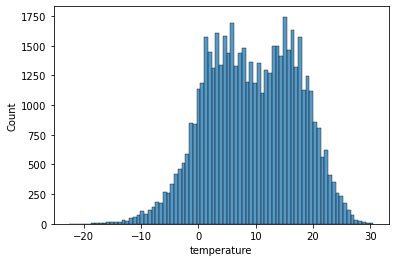

In [44]:
sns.histplot(data=data, x='temperature')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53204 entries, 0 to 53203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    53204 non-null  datetime64[ns]
 1   temperature  53204 non-null  float64       
 2   year         53204 non-null  int64         
 3   month        53204 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 MB


In [28]:
data = data.astype({'month':'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53204 entries, 0 to 53203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    53204 non-null  datetime64[ns]
 1   temperature  53204 non-null  float64       
 2   year         53204 non-null  int64         
 3   month        53204 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 1.3 MB


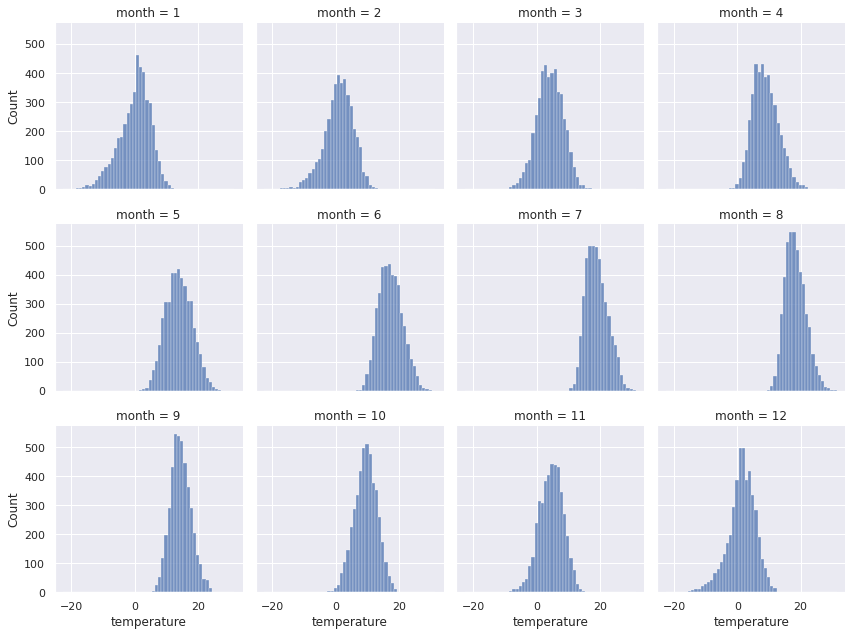

In [99]:
sns.set_theme(style="darkgrid")

sns.displot(
    data, x="temperature",col='month', col_wrap=4,
    binwidth=1, height= 3, facet_kws=dict(margin_titles=True))

In [ ]:
#Remove all 29th February dates

In [45]:
data.head()
data['day'] = pd.DatetimeIndex(data['timestamp']).day

In [46]:
mask = data[(data['month'] == 2)&(data['day'] == 29)]
mask['remove_day'] = 1
mask.head()

/home/rita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,timestamp,temperature,year,month,day,remove_day
59,1876-02-29,2.1,1876,2,29,1
1520,1880-02-29,7.0,1880,2,29,1
2981,1884-02-29,0.8,1884,2,29,1
4442,1888-02-29,-6.2,1888,2,29,1
5903,1892-02-29,1.6,1892,2,29,1


In [47]:
data = data.merge(mask,how='left',on=['timestamp','temperature','year','month','day'])
data.head()

,timestamp,temperature,year,month,day,remove_day
0,1876-01-01,2.2,1876,1,1,NaN
1,1876-01-02,2.5,1876,1,2,NaN
2,1876-01-03,0.3,1876,1,3,NaN
3,1876-01-04,-5.8,1876,1,4,NaN
4,1876-01-05,-9.8,1876,1,5,NaN


In [48]:
data = data[data['remove_day']!= 1]

In [107]:
#Make sure you have entire years => remove 1st 6 months of 1876
data[data['year']==2021] # 2021 ends on 31st August

,timestamp,temperature,year,month,day,remove_day
52961,2021-01-01,2.1,2021,1,1,NaN
52962,2021-01-02,1.1,2021,1,2,NaN
52963,2021-01-03,0.6,2021,1,3,NaN
52964,2021-01-04,0.8,2021,1,4,NaN
52965,2021-01-05,1.7,2021,1,5,NaN
...,...,...,...,...,...,...
53199,2021-08-27,14.2,2021,8,27,NaN
53200,2021-08-28,15.4,2021,8,28,NaN
53201,2021-08-29,15.8,2021,8,29,NaN
53202,2021-08-30,15.8,2021,8,30,NaN


In [49]:
data = data[data['timestamp'] > '1876-08-31']
data.drop(columns=['remove_day'])

,timestamp,temperature,year,month,day
244,1876-09-01,13.3,1876,9,1
245,1876-09-02,15.0,1876,9,2
246,1876-09-03,14.2,1876,9,3
247,1876-09-04,14.8,1876,9,4
248,1876-09-05,19.5,1876,9,5
...,...,...,...,...,...
53199,2021-08-27,14.2,2021,8,27
53200,2021-08-28,15.4,2021,8,28
53201,2021-08-29,15.8,2021,8,29
53202,2021-08-30,15.8,2021,8,30


In [50]:
pd.DataFrame(data.groupby(['year','month'])['temperature'].mean())

temperature
year month             
1876 9        13.840000
     10       11.877419
     11        2.060000
     12        1.125806
1877 1         3.138710
...                 ...
2021 4         7.183333
     5        12.554839
     6        21.633333
     7        21.206452
     8        18.054839

[1740 rows x 1 columns]

In [51]:
#Test split the data + validation split the data
# 60% training data => from 1876 to 1963(August)
# 20% validation data => from 1963(September) to 1992(August)
# 20% test data => from 1992(September) to 2021

#Group data by it's month

train = data[data['timestamp'] <= '1963-08-31']
train = pd.DataFrame(train.groupby(['year','month'])['temperature'].mean())

val = data[(data['timestamp'] > '1963-08-31')& (data['timestamp'] <= '1992-08-31')]
val = pd.DataFrame(val.groupby(['year','month'])['temperature'].mean())

test = data[data['timestamp'] > '1992-08-31']
test = pd.DataFrame(test.groupby(['year','month'])['temperature'].mean())

In [52]:
train.shape, val.shape, test.shape

((1044, 1), (348, 1), (348, 1))

<AxesSubplot:xlabel='year,month'>

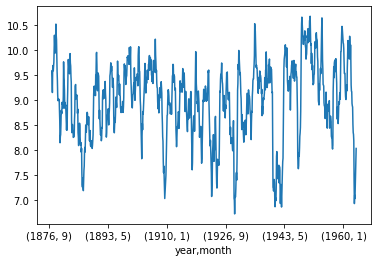

In [53]:
train.rolling(12)['temperature'].mean().plot()


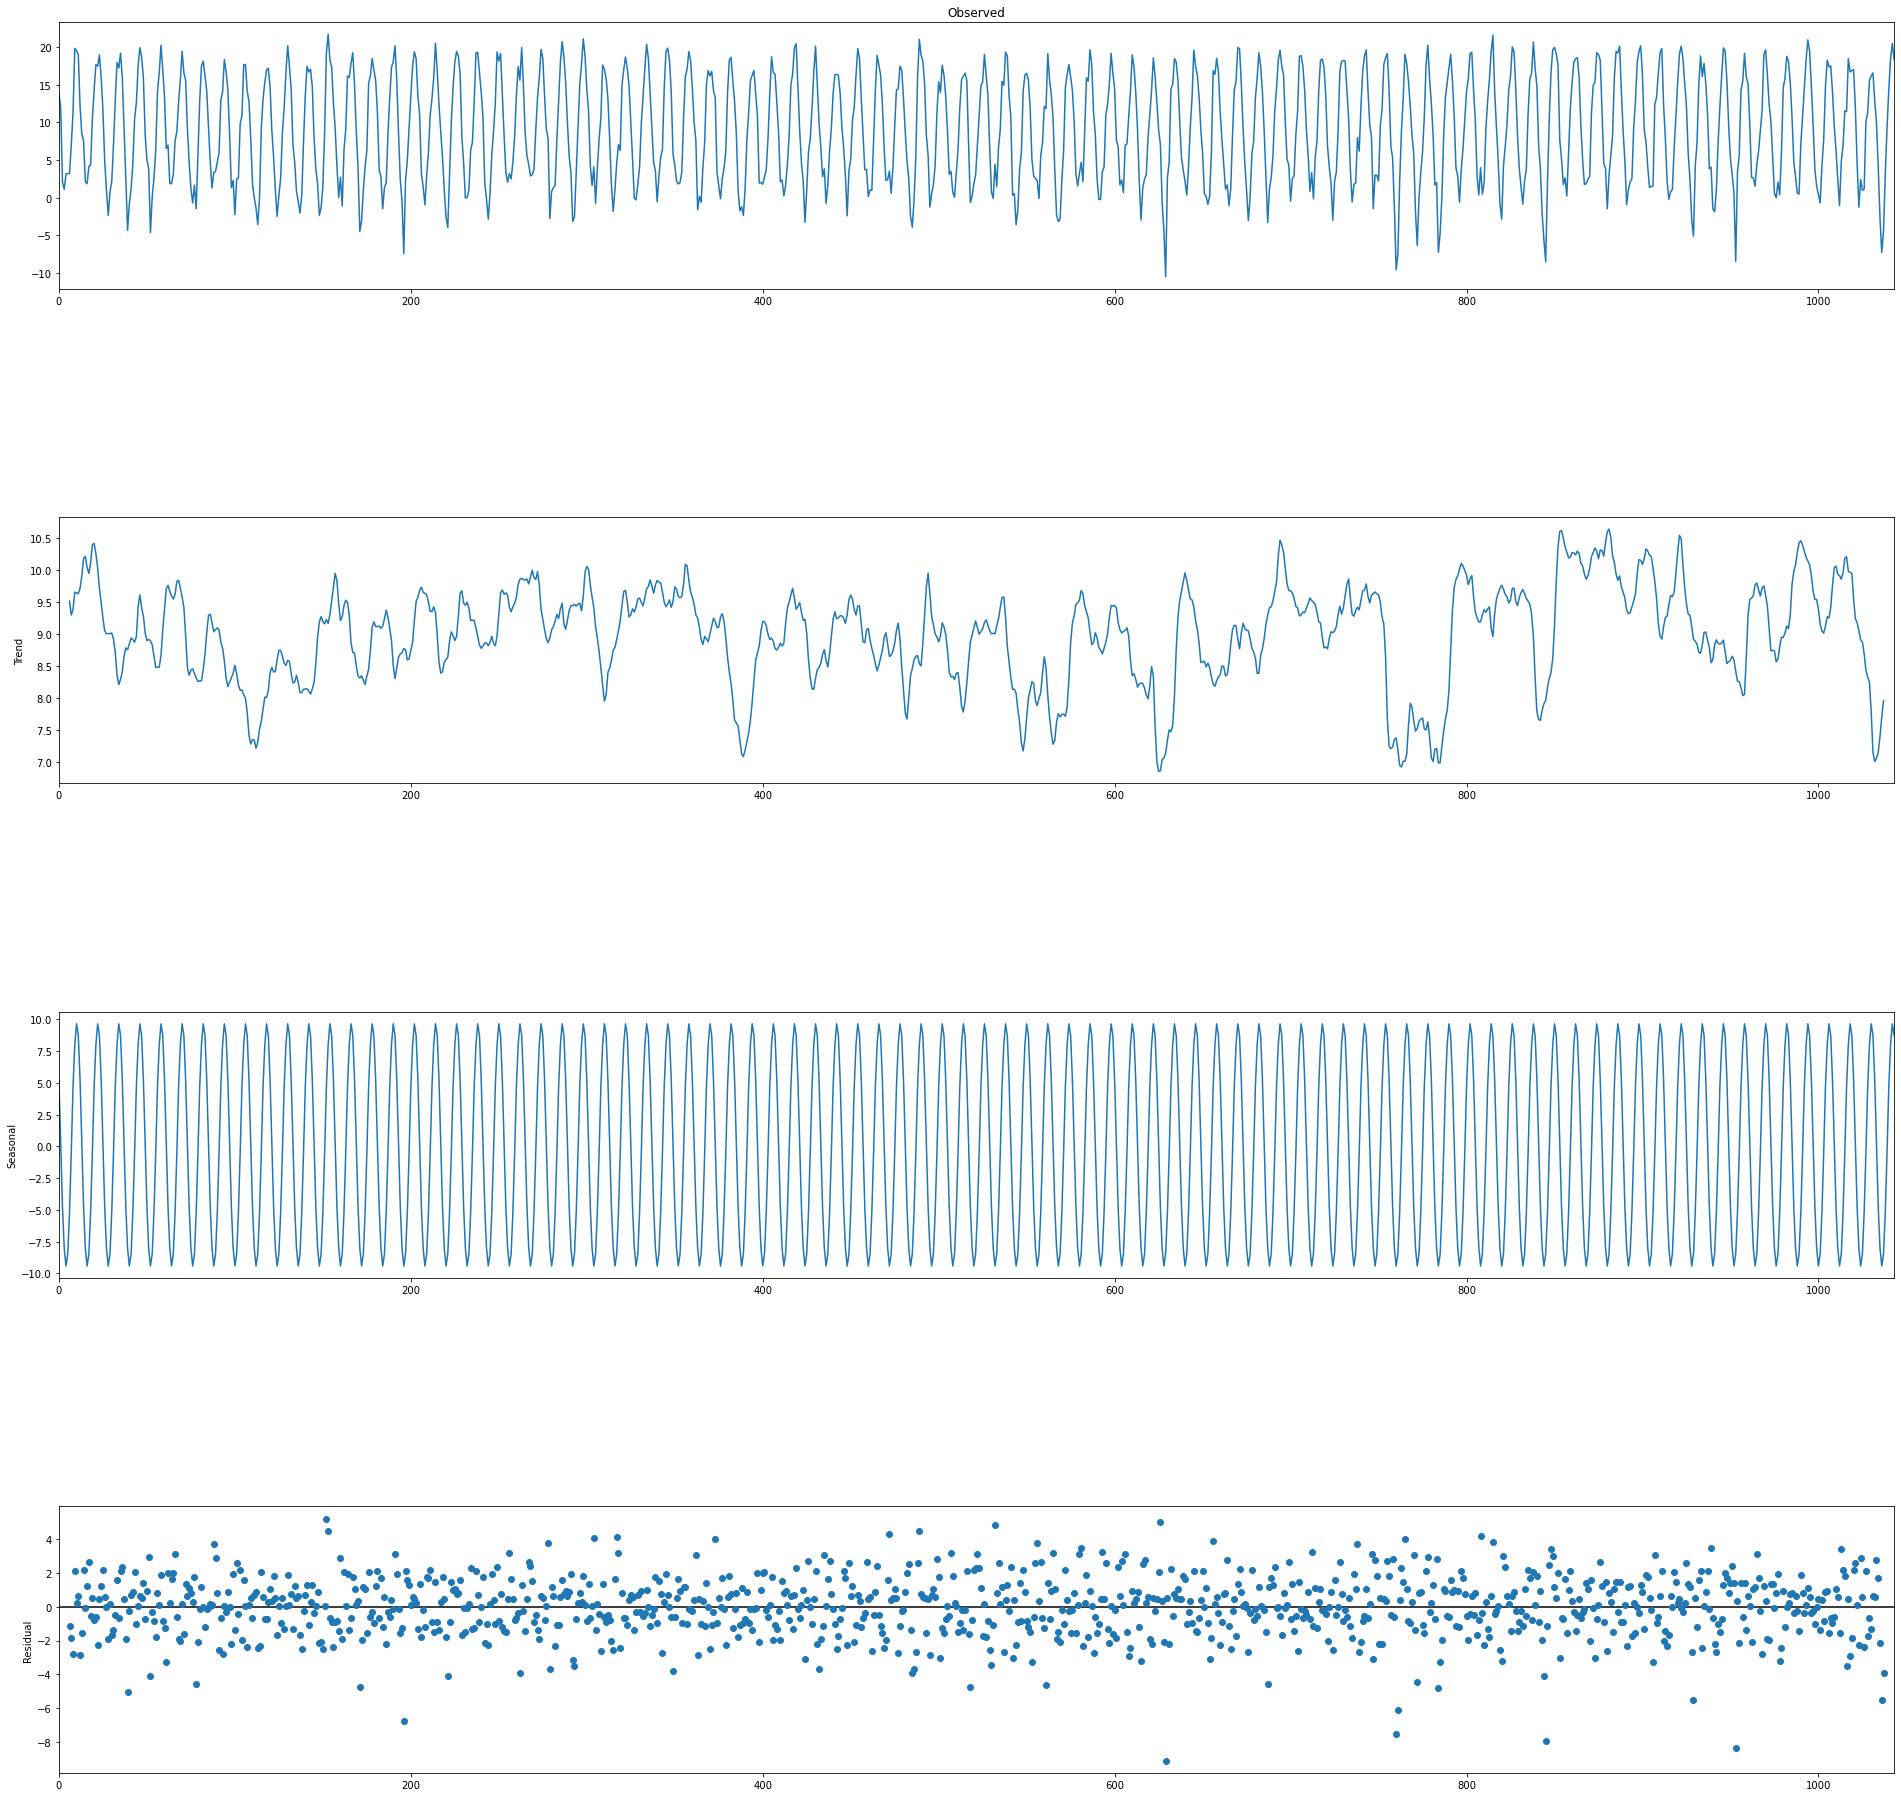

In [90]:
#Decompose the data into trend, seasonality and residual 

#baseline model 

from statsmodels.tsa.seasonal import seasonal_decompose

r = seasonal_decompose(train['temperature'].values, period=12)

#r.plot()
f = r.plot()
f.set_figwidth(30)
f.set_figheight(30)

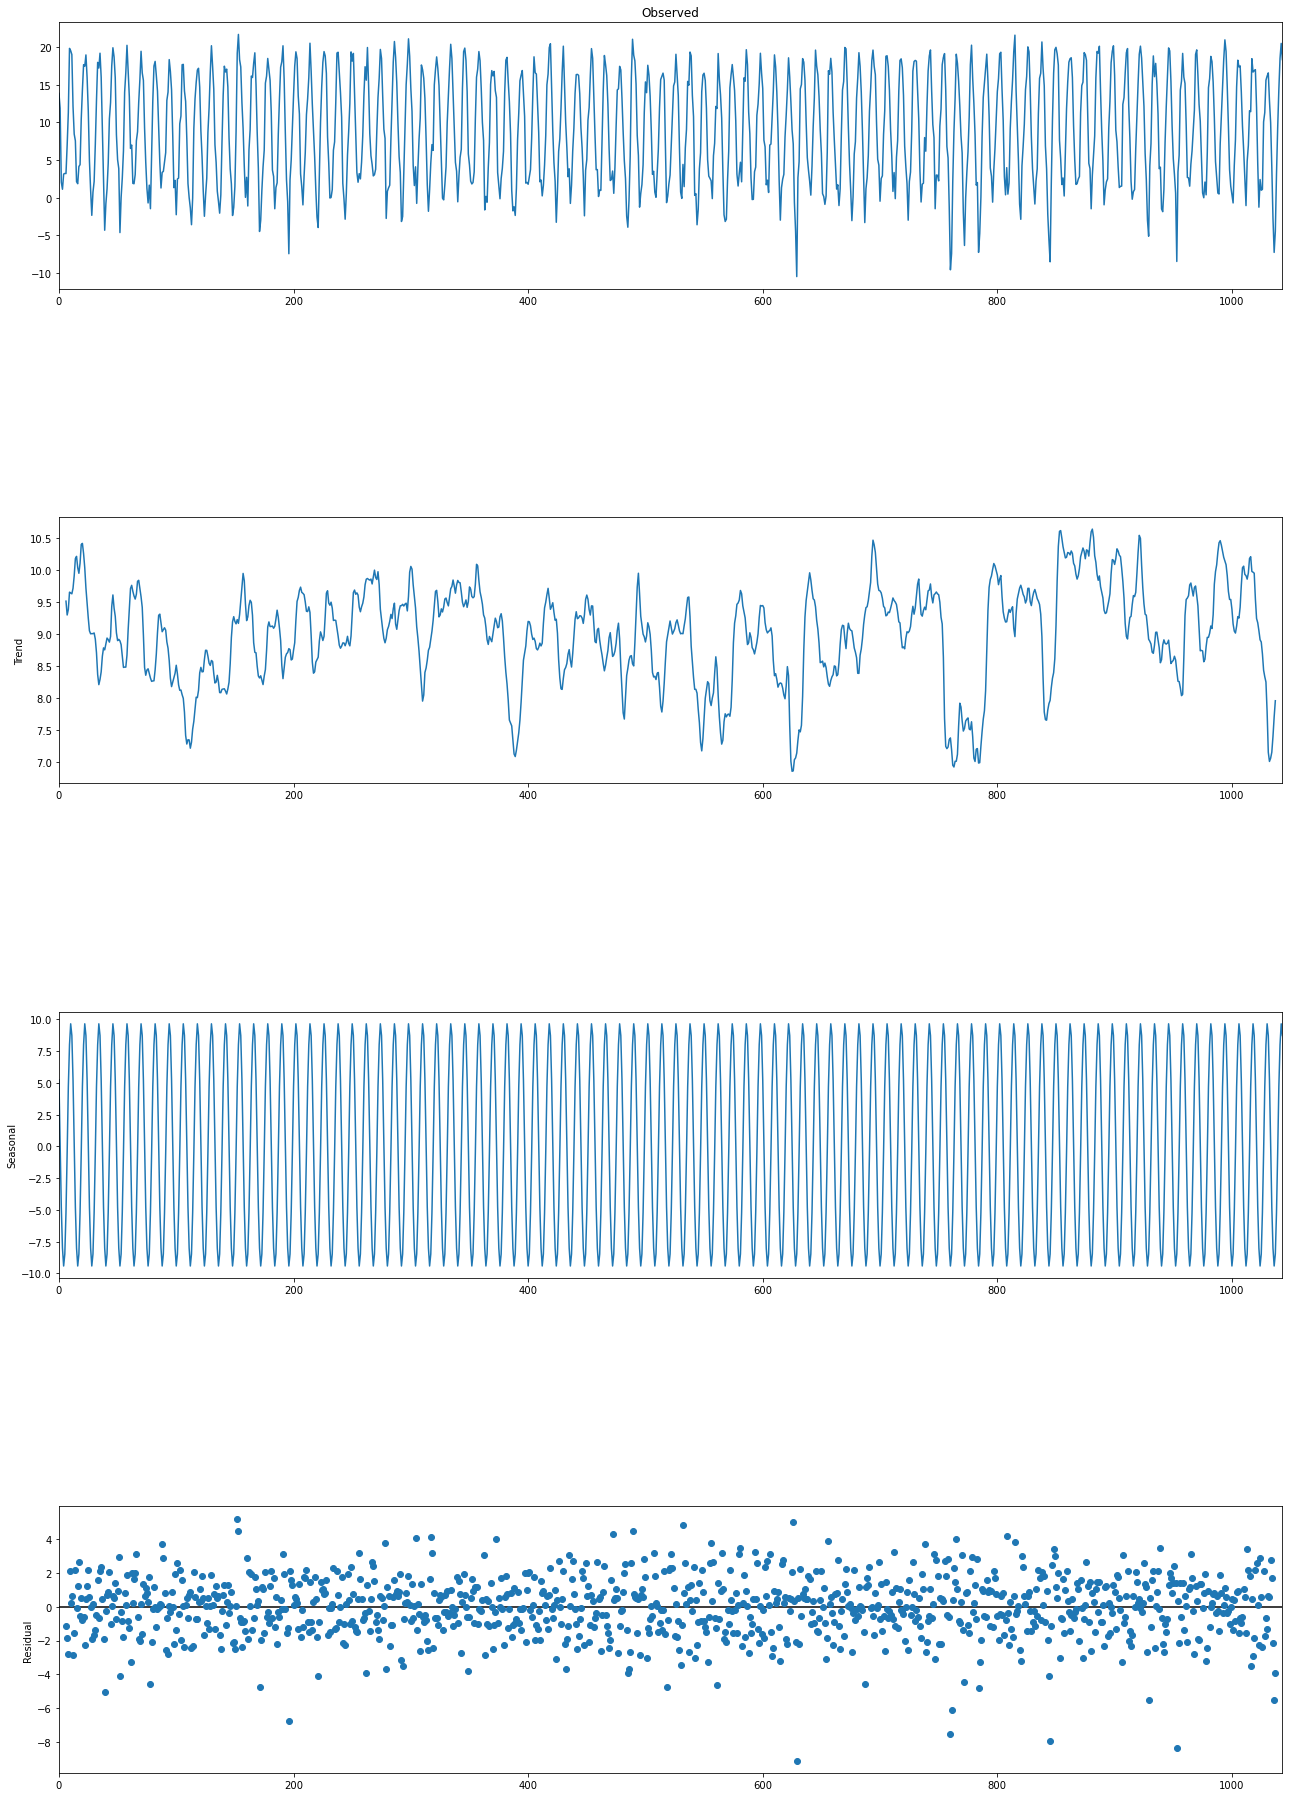

In [56]:
r.seasonal

array([ 5.23531423,  0.08660085, -4.78636921, ...,  7.99823257,
        9.65068725,  8.72949049])

In [137]:
r.trend

array([nan, nan, nan, ..., nan, nan, nan])

In [140]:
r.resid 

array([nan, nan, nan, ..., nan, nan, nan])

<AxesSubplot:>

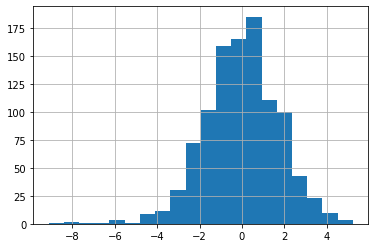

In [57]:
# Inspect the residues : do they follow a normal distribution? 
pd.Series(r.resid).hist(bins=20)

In [58]:
# Inspect the residues : do we see autocorrelation in the lags?
#Create the lags 
train['t-1'] = train['temperature'].shift(1) # moves the entire column by one row
train['t-2'] = train['temperature'].shift(2)
train['t-3'] = train['temperature'].shift(3)
train.head()


temperature        t-1        t-2        t-3
year month                                              
1876 9        13.840000        NaN        NaN        NaN
     10       11.877419  13.840000        NaN        NaN
     11        2.060000  11.877419  13.840000        NaN
     12        1.125806   2.060000  11.877419  13.840000
1877 1         3.138710   1.125806   2.060000  11.877419

In [144]:
train.corr()

,temperature,t-1,t-2,t-3
temperature,1.000000,0.820405,0.469505,0.001234
t-1,0.820405,1.000000,0.820073,0.468605
t-2,0.469505,0.820073,1.000000,0.819728
t-3,0.001234,0.468605,0.819728,1.000000


In [59]:
#Inspect the residue lag correlation
residual = pd.DataFrame(r.resid).dropna()

residual['t-1'] = residual[0].shift(1) # moves the entire column by one row
residual['t-2'] = residual[0].shift(2)
residual['t-3'] = residual[0].shift(3)

residual.corr()


,0,t-1,t-2,t-3
0,1.000000,0.115809,-0.085960,-0.209424
t-1,0.115809,1.000000,0.109895,-0.088848
t-2,-0.085960,0.109895,1.000000,0.106801
t-3,-0.209424,-0.088848,0.106801,1.000000


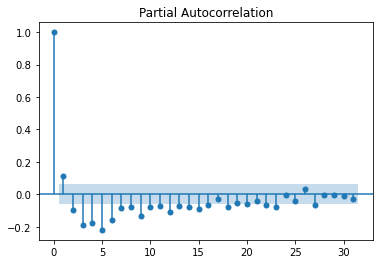

In [60]:
#Partial Autocorrelation

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(residual[0].values)
# x-axis: time lags
# y-axis: correlation coefficient (after removing the correlation with previous lags)
None  # avoids plot getting printed twice


In [65]:
# Build AR model using stats model
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

y = np.arange(1, 100)
m = AutoReg(y, lags=6, old_names=True)
result = m.fit()

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                     AutoReg(6)   Log Likelihood                2820.027
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 08 Oct 2021   AIC                            -63.312
Time:                        13:18:34   BIC                            -63.094
Sample:                             6   HQIC                           -63.224
                                   99                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1892   1.87e-16   1.01e+15      0.000       0.189       0.189
y.L1           0.6396   4.59e-16   1.39e+15      0.000       0.640       0.640
y.L2           0.4505   2.72e-16   1.66e+15      0.000       0.450       0.450
y.L3           0.2613   8.48e-17   3.08e+15      0.000       0.261       0.261
y.L4           0.0721   1.03e-16   7.01e+14      0.000       0.072       0.072
y.L5          -0.1171    2.9e-16  -4.04e+14      0.000      -0.117      -0.117
y.L6          -0.3063   4.78e-16  -6.41e+14      0.000      -0.306      -0.306
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2            1.0430           -0.0000j            1.0430           -0.0000
AR.3           -0.0286           -1.3032j            1.3035           -0.2535
AR.4           -0.0286           +1.3032j            1.3035            0.2535
AR.5           -1.1841           -0.6635j            1.3573           -0.4187
AR.6           -1.1841           +0.6635j            1.3573            0.4187
-----------------------------------------------------------------------------
"""

In [75]:
#Build AR model using sklearn 

X = train[['t-1']]
y = train['temperature']
#X.shape, y.shape

In [77]:
X = X.reset_index()
X = X.drop([0])
X = X.set_index(['year', 'month'])
X.shape

(1043, 1)

In [79]:
y = y.reset_index()
y = y.drop([0])
y = y.set_index(['year', 'month'])
y.shape


(1043, 1)

In [80]:
import statsmodels.api as sm
m = sm.OLS(y,X)
res = m.fit()
print(res.summary())



                                 OLS Regression Results                                
Dep. Variable:            temperature   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              6791.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:29:43   Log-Likelihood:                         -2971.0
No. Observations:                1043   AIC:                                      5944.
Df Residuals:                    1042   BIC:                                      5949.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [82]:
from sklearn.linear_model import LinearRegression
m0 = LinearRegression()  # instantiate model
m0 = m.fit(X,y)
m0.plot()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [87]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
###Model Comparison Output - Evaluation metrics 
## m0 Linear regression 
## m1 Baseline AR 
## m2 AR with seasonality 
## m3 AR with seasonality and log transformation 

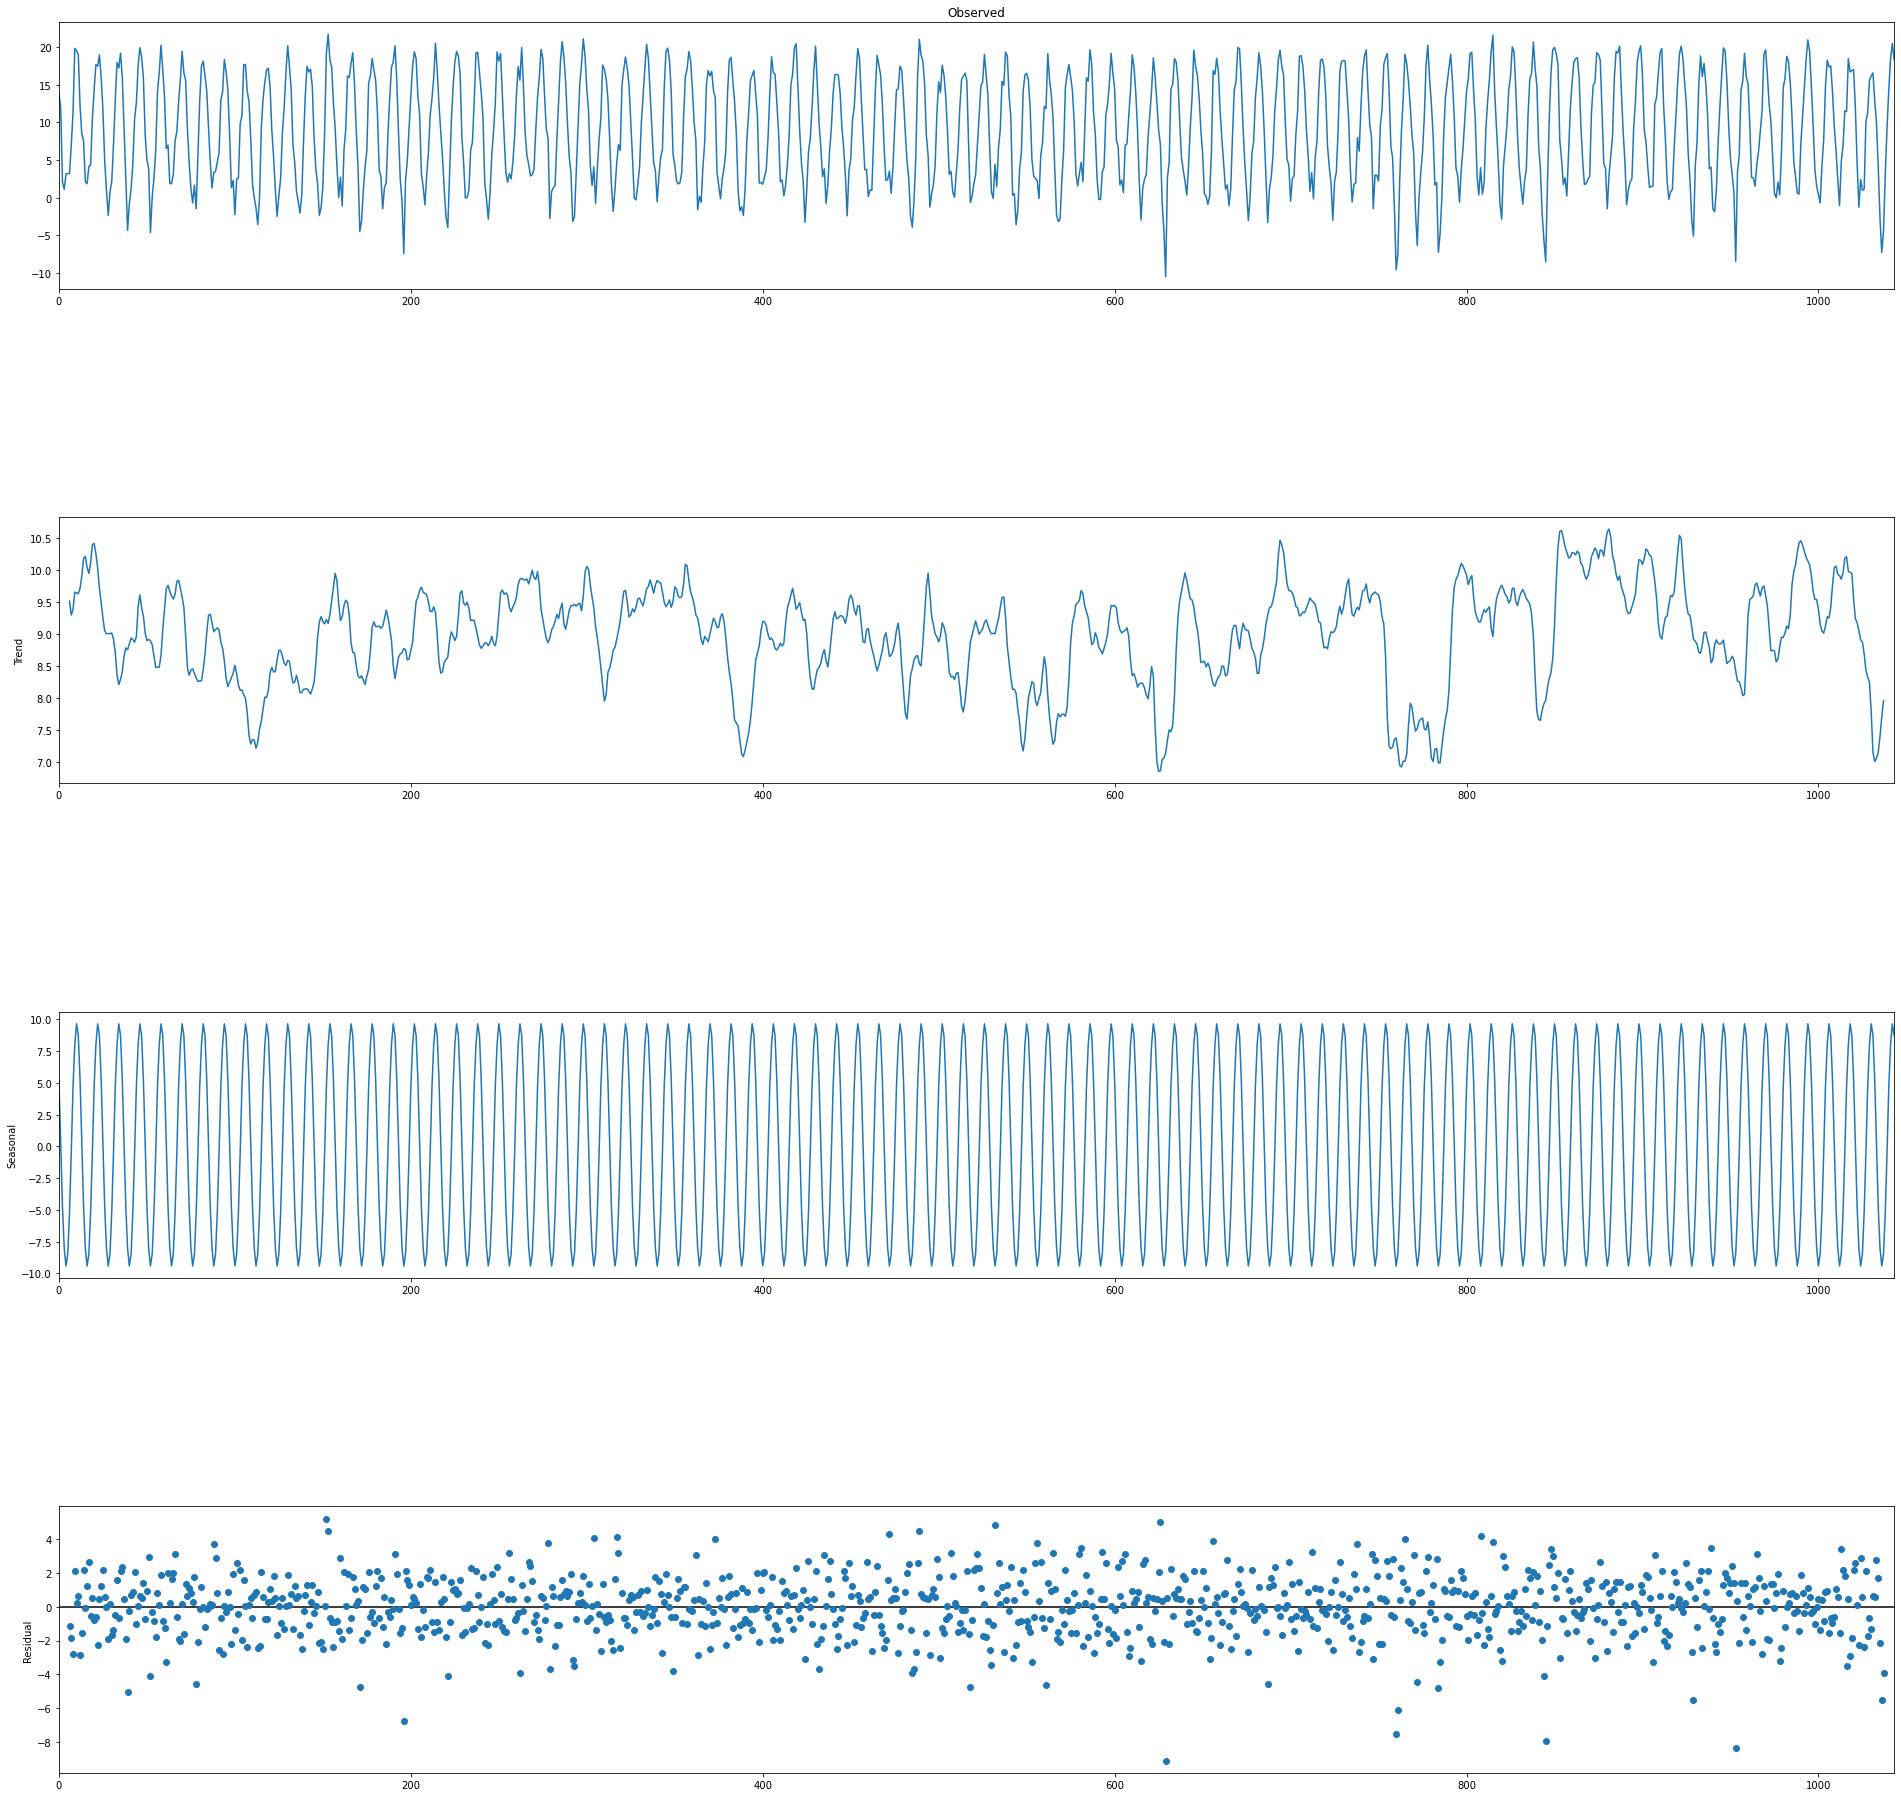

In [91]:
#Decompose the data into trend, seasonality and residual 

#baseline model 

from statsmodels.tsa.seasonal import seasonal_decompose

r = seasonal_decompose(train['temperature'].values, period=12)

#r.plot()
f = r.plot()
f.set_figwidth(30)
f.set_figheight(30)

In [ ]:
## m4 Exponential smoothing Holt Winters(includes seasonality and trend)
# Pros: gives more importance to more recent lags + can handle trend and seasonality effects 
# Cons:does not model very well irregular data, computationally more expensive than AR 
# takes into consideration at least 3 parameters(alpha(lag weight), beta(trend effect), gamma(seasonality effect))
# can have additive or multiplicative effect 

In [94]:
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


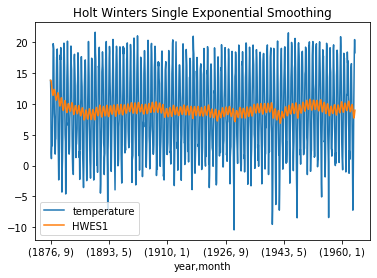

In [96]:
#Fitting Single Exponential Smoothing 

# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)


train['HWES1'] = SimpleExpSmoothing(train['temperature']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues

train[['temperature','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')


/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='year,month'>

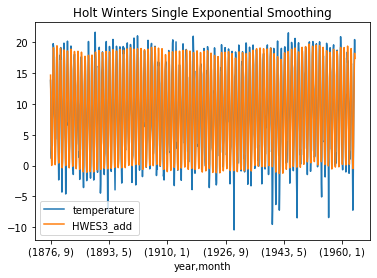

In [102]:
train['HWES3_add'] = ExponentialSmoothing(train['temperature']
                                          #, smoothing_level=alpha
                                          , seasonal='add'
                                          , seasonal_periods=12).fit().fittedvalues

train[['temperature','HWES3_add']].plot(title='Holt Winters Single Exponential Smoothing')


In [ ]:

fit1 = SimpleExpSmoothing(y, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False)

/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                 1043
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2841.616
Date:                Fri, 08 Oct 2021   AIC                           5689.232
Time:                        14:08:22   BIC                           5704.073
Sample:                             0   HQIC                          5694.861
                               - 1043                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5634      0.057      9.968      0.000       0.453       0.674
ma.L1         -0.1089      0.069     -1.576      0.115      -0.244       0.027
sigma2        13.8289      0.594     23.267      0.0

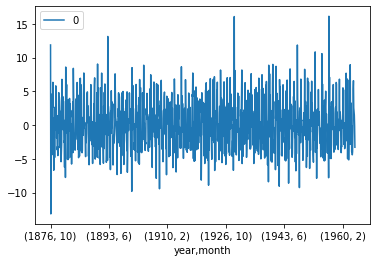

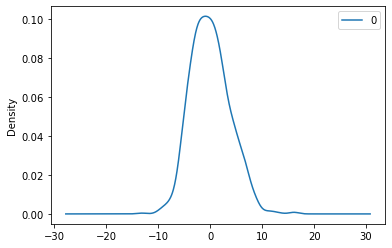

                 0
count  1043.000000
mean      0.011439
std       3.758230
min     -13.163315
25%      -2.664668
50%      -0.238010
75%       2.369249
max      16.131858


In [89]:
model_sarima = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit = model_sarima.fit()  


prediction_sarima=model_sarima_fit.forecast(np.shape(y)[0])

#valid_ml["SARIMA Model Prediction"]=list(np.exp(prediction_sarima))

print(model_sarima_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_sarima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            temperature   No. Observations:                 1043
Model:                     ARMA(2, 0)   Log Likelihood               -2686.702
Method:                       css-mle   S.D. of innovations              3.177
Date:                Fri, 08 Oct 2021   AIC                           5381.404
Time:                        14:03:55   BIC                           5401.204
Sample:                             0   HQIC                          5388.914
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0103      0.337     26.713      0.000       8.349       9.671
ar.L1.temperature     1.3312      0.024     54.843      0.000       1.284       1.379
ar.L2.temperature    -0.

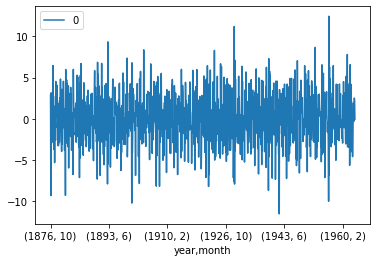

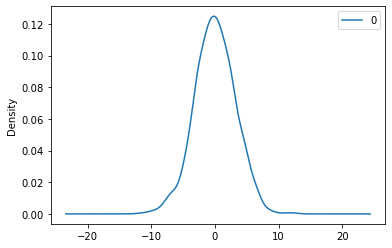

                 0
count  1043.000000
mean     -0.004693
std       3.184747
min     -11.510022
25%      -2.108753
50%      -0.027750
75%       2.164028
max      12.427740


In [86]:
model_ar = ARIMA(y, order=(2, 0, 0))  
model_ar_fit = model_ar.fit()  

prediction_ar=model_ar_fit.forecast(len(y))[0]

print(model_ar_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_ar_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
# Make predictions: all, seasonality, trend 

In [208]:
y_true = val['temperature'].values
y_true.shape

(348,)

In [210]:
val

temperature
year month             
1963 9        15.573333
     10        9.487097
     11        8.040000
     12       -2.574194
1964 1        -1.816129
...                 ...
1992 4         9.276667
     5        15.564516
     6        20.526667
     7        20.874194
     8        20.912903

[348 rows x 1 columns]

In [ ]:
#Evaluation metrics: MSE, MAE, RMSE, R², MAPE, AIC 

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
np.sum((ypred - ytrue) ** 2) / n #MSE

In [ ]:
np.sum(np.abs(ypred - ytrue)) / n #MAE

In [ ]:
np.sqrt(np.sum((ypred - ytrue) ** 2) / n)#RMSE

In [ ]:
100 * np.sum(np.abs((ypred - ytrue) / ytrue) ) / n # MAPE

In [ ]:
#Get statsmodel for R2 and AIC criteria test 

In [ ]:
#apply several of the tools from the spreadsheet on the climate data. The approach described is most useful to generate a short-term forecast

In [ ]:
#To try the evaluation metrics in practice, you could try the following baseline models:
#:dart: predict a manually set dummy value (like in the notebook)
#:dart: always predict the mean temperature
#:dart: always predict the last temperature seen
#:dart: simple linear regression without any feature engineering, only using a single feature df['x'] = range(df.shape[0])

In [ ]:
#Compare different models output 

In [ ]:
#test remainder for stationarity : Augmented Dicker-Fuller Test

In [ ]:
#recipe for a long-term climate forecast
#resample the data to the yearly mean --> fewer data points
#use the year as the timestep X == df[['year']]
#fit a LinearRegression model on x and the yearly mean temperature
#predict 50 time steps (years) into the future with m.predict()
#for a better fit, also try polynomials of X